In [44]:
import pandas as pd
import numpy as np

In [45]:
df = pd.read_csv('data.csv')
df.head()

,id,diagnosis,radius_1ean,texture_1ean,peri1eter_1ean,area_1ean,s1oothness_1ean,co1pactness_1ean,concavity_1ean,concave points_1ean,...,radius_worst,texture_worst,peri1eter_worst,area_worst,s1oothness_worst,co1pactness_worst,concavity_worst,concave points_worst,sy11etry_worst,fractal_di1ension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [46]:
df.drop(columns=['id','Unnamed: 32'],inplace=True)
df.head()

KeyError: "['Unnamed: 32'] not found in axis"

In [47]:
df.shape

(569, 32)

In [48]:
df.value_counts('diagnosis')

diagnosis
0    357
1    212
Name: count, dtype: int64

In [49]:
X = df.iloc[:,1:-1]
y = df.iloc[:,0]

In [50]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2, random_state=2)

In [51]:
X_train.head()

,diagnosis,radius_1ean,texture_1ean,peri1eter_1ean,area_1ean,s1oothness_1ean,co1pactness_1ean,concavity_1ean,concave points_1ean,sy11etry_1ean,...,fractal_di1ension_se,radius_worst,texture_worst,peri1eter_worst,area_worst,s1oothness_worst,co1pactness_worst,concavity_worst,concave points_worst,sy11etry_worst
560,0,14.05,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.04304,0.1537,...,0.005304,15.30,33.17,100.20,706.7,0.1241,0.22640,0.1326,0.10480,0.2250
428,0,11.13,16.62,70.47,381.1,0.08151,0.03834,0.01369,0.01370,0.1511,...,0.002377,11.68,20.29,74.35,421.1,0.1030,0.06219,0.0458,0.04044,0.2383
198,1,19.18,22.49,127.50,1148.0,0.08523,0.14280,0.11140,0.06772,0.1767,...,0.003397,23.36,32.06,166.40,1688.0,0.1322,0.56010,0.3865,0.17080,0.3193
203,1,13.81,23.75,91.56,597.8,0.13230,0.17680,0.15580,0.09176,0.2251,...,0.004506,19.20,41.85,128.50,1153.0,0.2226,0.52090,0.4646,0.20130,0.4432
41,1,10.95,21.35,71.90,371.1,0.12270,0.12180,0.10440,0.05669,0.1895,...,0.003040,12.84,35.34,87.22,514.0,0.1909,0.26980,0.4023,0.14240,0.2964


In [52]:
X_train.shape

(455, 30)

In [53]:
from sklearn.preprocessing import StandardScaler
sd = StandardScaler()

X_train = sd.fit_transform(X_train)
X_test = sd.transform(X_test)

In [54]:
X_train

array([[-0.76148612, -0.01330339,  1.7757658 , ..., -0.65932952,
        -0.13236958, -1.08014517],
       [-0.76148612, -0.8448276 , -0.6284278 , ..., -1.07819957,
        -1.11552632, -0.85773964],
       [ 1.31322157,  1.44755936,  0.71180168, ...,  0.56591367,
         0.87583964,  0.4967602 ],
       ...,
       [-0.76148612, -0.46608541, -1.49375484, ..., -1.21843418,
        -1.32388956, -1.02997851],
       [-0.76148612, -0.50025764, -1.62161319, ..., -0.43493484,
        -0.0987626 ,  0.35796577],
       [ 1.31322157,  0.96060511,  1.21181916, ...,  1.06054709,
         0.8956983 , -1.23064515]])

In [55]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)

In [56]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [57]:
y_pred = knn.predict(X_test)

In [58]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.0

In [59]:
scores = []
from sklearn.metrics import accuracy_score

for i in range(1,10):
    
    knn = KNeighborsClassifier(n_neighbors=i)

    knn.fit(X_train,y_train)

    y_pred = knn.predict(X_test)

    scores.append(accuracy_score(y_test, y_pred))

In [60]:
scores

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

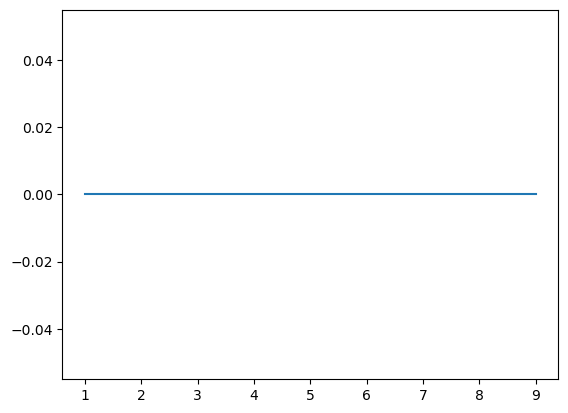

In [61]:
import matplotlib.pyplot as plt

plt.plot(range(1,10),scores)

In [62]:
print(f"Accuracy score of KNN model is {round(accuracy_score(y_test, y_pred)*100,2)} %")

Accuracy score of KNN model is 0.0 %


In [63]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [64]:
confusion_matrix(y_test,y_pred)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [66]:
print(f"Precision score of KNN model is {round(precision_score(y_test, y_pred),2)}")
print(f"Recall score of KNN model is {round(recall_score(y_test, y_pred),2)}")
print(f"F1 score of KNN model is {round(f1_score(y_test, y_pred),2)}")

ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].